Opening raw data file data/BCIproject_trial-5_raw.fif.gz...
    Range : 0 ... 29316 =      0.000 ...   234.528 secs
Ready.
Reading 0 ... 29316  =      0.000 ...   234.528 secs...


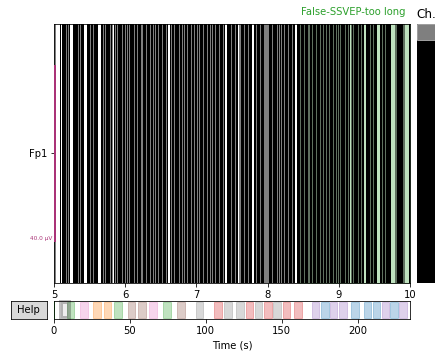

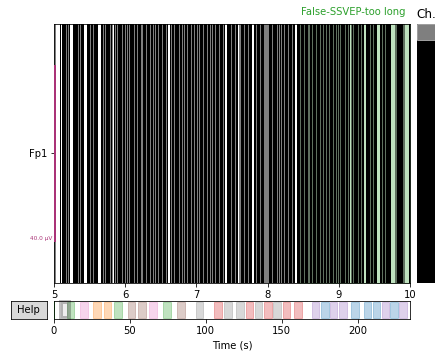

In [2]:
import mne
data = mne.io.read_raw_fif("data/BCIproject_trial-5_raw.fif.gz", preload=True)
data.plot(start=5, duration=5, n_channels=1)

In [3]:
data = data.crop(2)

In [4]:
data = data.filter(5, 50)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 5 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 5.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 4.00 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.25 Hz)
- Filter length: 207 samples (1.656 sec)



In [9]:
[i["description"] for i in data.annotations]

['False-SSVEP-too long',
 'True-SSVEP-too long',
 'False-SSVEP-',
 'False-SSVEP-',
 'False-SSVEP-too long',
 'True-SSVEP-',
 'True-SSVEP-',
 'True-SSVEP-too long',
 'False-SSVEP-too long',
 'True-SSVEP-',
 'True-TMI-',
 'False-TMI-',
 'True-TMI-',
 'True-TMI-',
 'False-TMI-',
 'True-TMI-',
 'False-TMI-',
 'True-TMI-',
 'False-TMI-',
 'False-TMI-',
 'True-LMI-',
 'False-LMI-',
 'True-LMI-',
 'True-LMI-',
 'False-LMI-',
 'False-LMI-',
 'False-LMI-',
 'True-LMI-',
 'False-LMI-',
 'True-LMI-']

In [54]:
events, eventid = mne.events_from_annotations(data, regexp='False-SSVEP.*')
picks = mne.pick_types(data.info, eeg=True)

f1_epochs = mne.Epochs(data, events, tmin=0, tmax=5, picks=picks, preload=True, baseline=None)

events, eventid = mne.events_from_annotations(data, regexp='True-SSVEP.*')
f2_epochs = mne.Epochs(data, events, tmin=0, tmax=5, picks=picks, preload=True, baseline=None)

Used Annotations descriptions: ['False-SSVEP-', 'False-SSVEP-too long']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 5 events and 626 original time points ...
0 bad epochs dropped
Used Annotations descriptions: ['True-SSVEP-', 'True-SSVEP-too long']
5 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 5 events and 626 original time points ...
0 bad epochs dropped


In [57]:
f1_epochs[0]

<Epochs  |   1 events (all good), 0 - 5 sec, baseline off, ~125 kB, data loaded,
 '2': 1>

In [24]:
channels = ["O1", "O2", "P3", "P4"]

In [59]:
from scipy.signal import spectrogram
import numpy as np



f1_specs = []
f1_fs = []
f1_ts = []

for x in range(len(f1_epochs)):
    specs = []
    chnData = f1_epochs[x].pick_channels(channels).get_data()[0]
    for i in range(chnData.shape[0]):
        # frequency, time, intensity (shape fxt)
        f1_f, f1_t, c_spec = spectrogram(chnData[i,:],
                                            fs=125,
                                            nperseg=125,
                                            noverlap=115)
        specs.append(c_spec)

    f1_spec = np.mean(np.array(specs), axis=0)
    f1_specs.append(f1_spec)
    f1_fs.append(f1_f)
    f1_ts.append(f1_t)
    
    
f2_specs = []
f2_fs = []
f2_ts = []

for x in range(len(f1_epochs)):
    specs = []
    chnData = f2_epochs[x].pick_channels(channels).get_data()[0]
    for i in range(chnData.shape[0]):
        # frequency, time, intensity (shape fxt)
        f2_f, f2_t, c_spec = spectrogram(chnData[i,:],
                                            fs=125,
                                            nperseg=125,
                                            noverlap=115)
        specs.append(c_spec)

    f2_spec = np.mean(np.array(specs), axis=0)
    f2_specs.append(f2_spec)
    f2_fs.append(f2_f)
    f2_ts.append(f2_t)

In [49]:
 def plot_spectrogram(ts, fs, spec, savefig=False, filename=None):
        """Plots a spectrogram of FFT.
        Parameters
        ----------
        ts : np.array
            timestamps in seconds
        fs : np.array
            frequencies in Hz
        spec : np.array
            spectrogram (FFT magnitudes)
        savefig : boolean
            Whether to save the figure to disk.
        filename : str
            File name of the saved image.
        """
        f = plt.figure(figsize=(12, 12))
        plt.pcolormesh(ts, fs, spec, shading='gouraud')
        plt.ylabel('Frequency [Hz]')
        plt.xlabel('Time [sec]')
        plt.ylim([5, 50])
        plt.colorbar()
        plt.tight_layout()
        plt.show()
        if savefig:
            if filename is None:
                filename = 'saved_plot.png'

            plt.savefig(filename)

In [47]:
import matplotlib.pyplot as plt

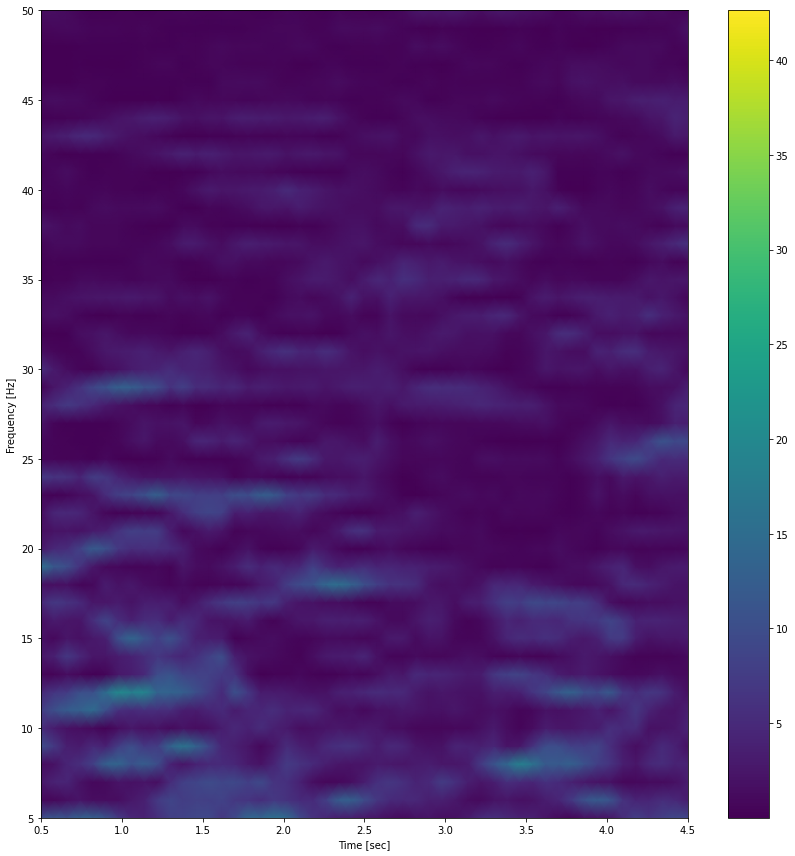

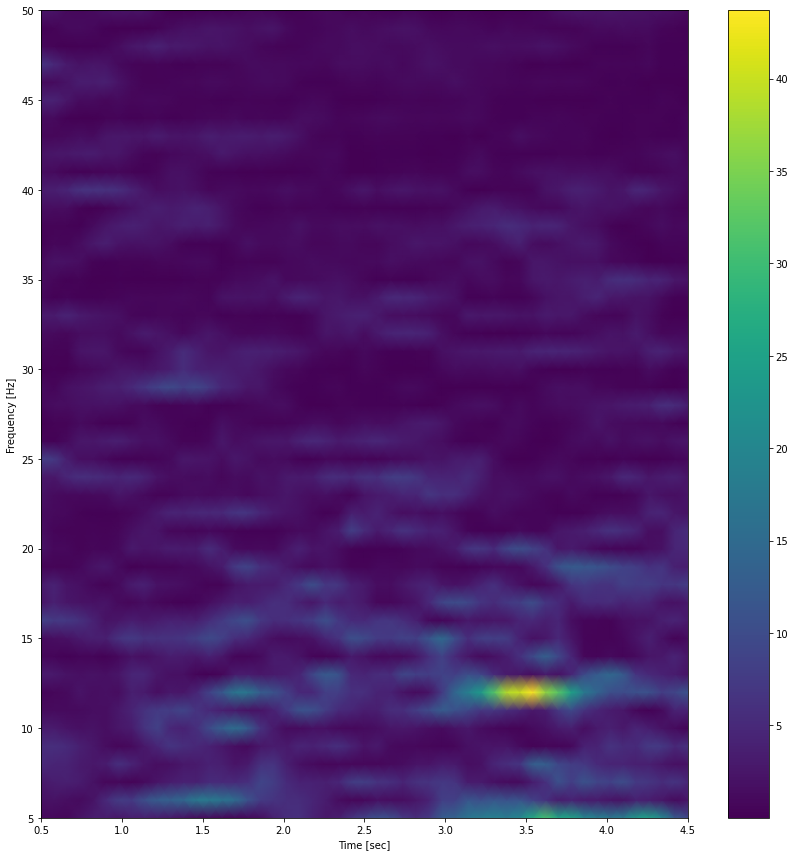

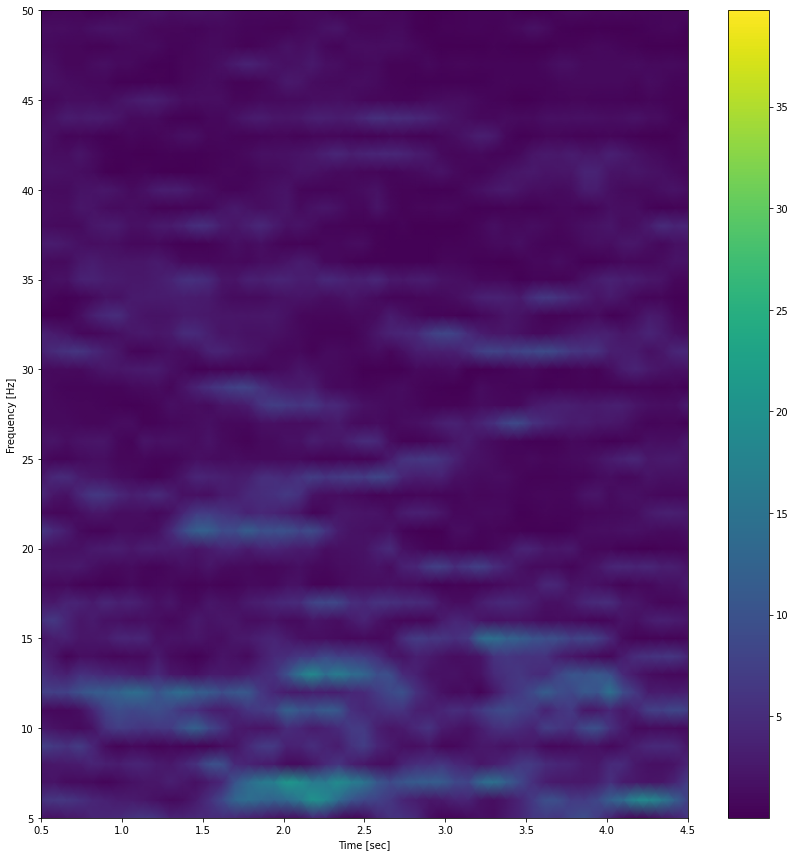

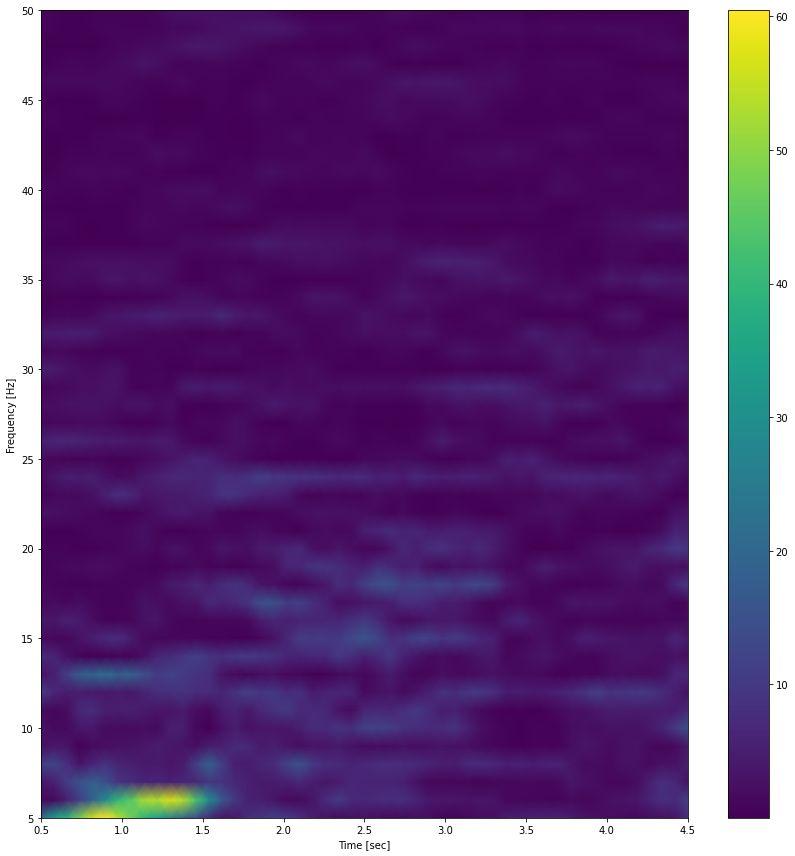

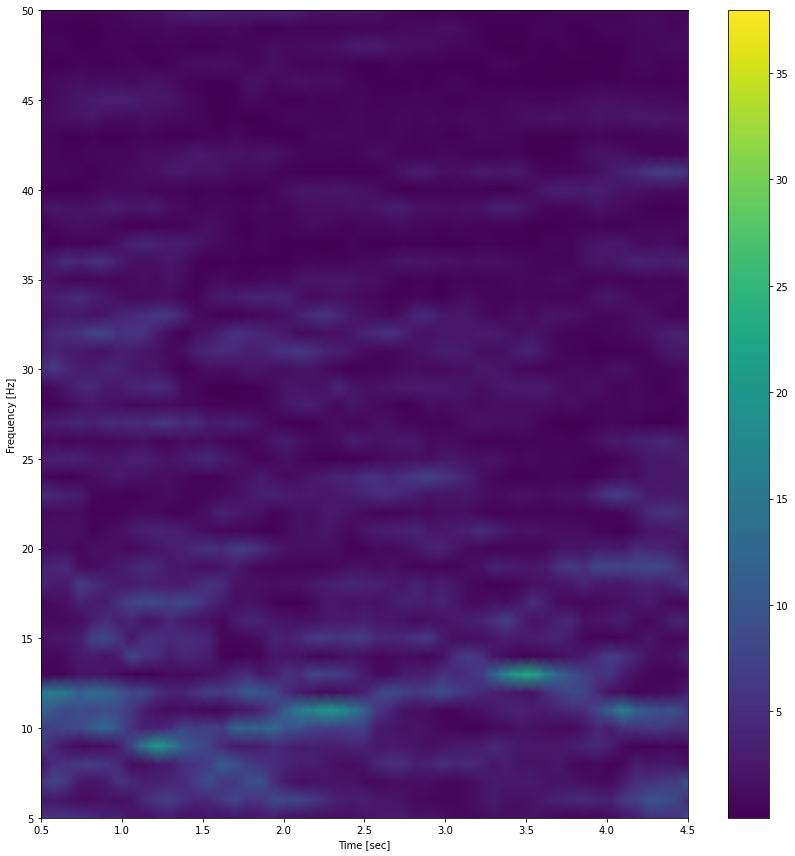

In [60]:
for z in range(len(f1_specs)):
    plot_spectrogram(f1_ts[z], f1_fs[z], f1_specs[z])

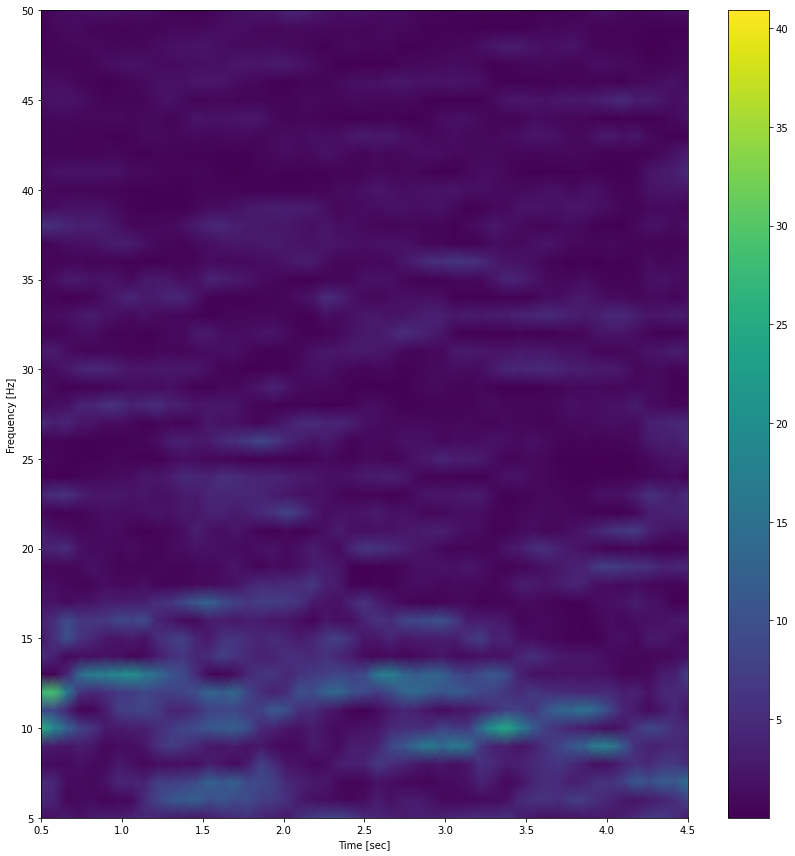

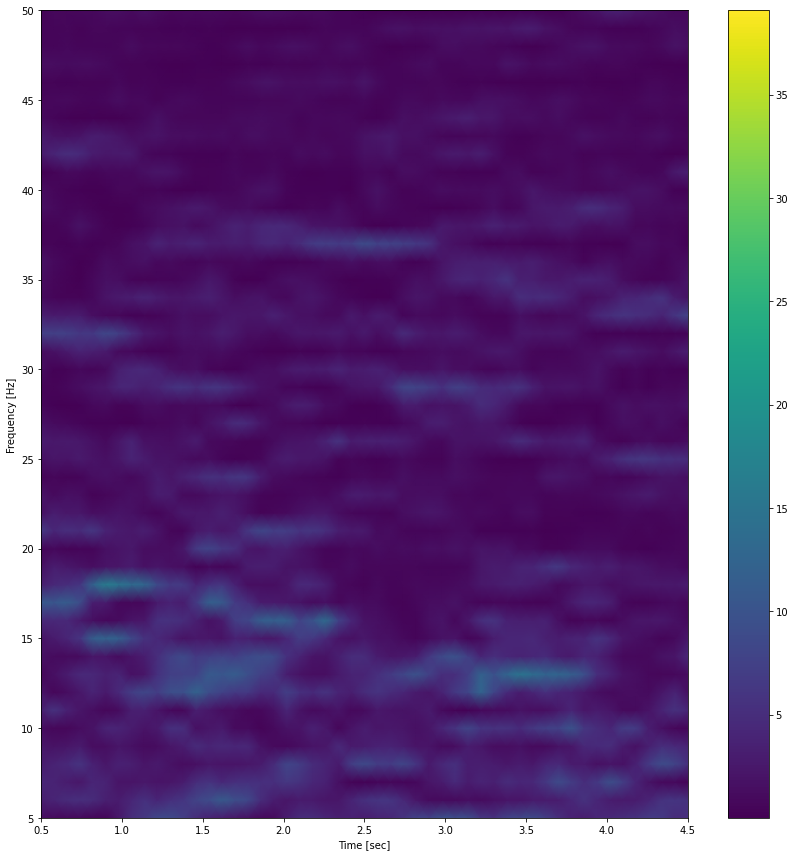

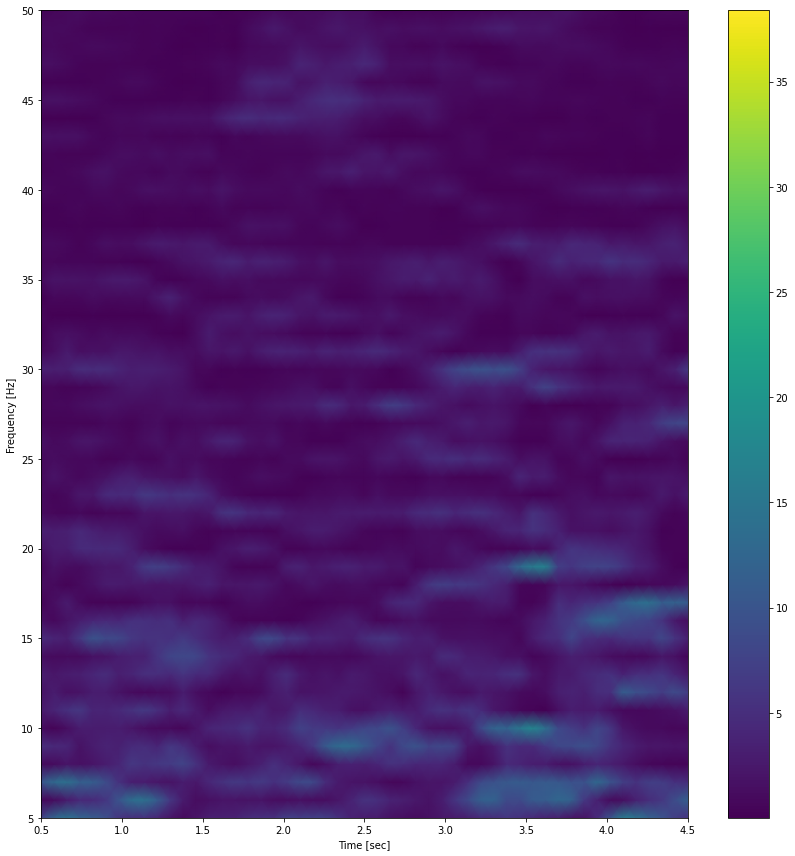

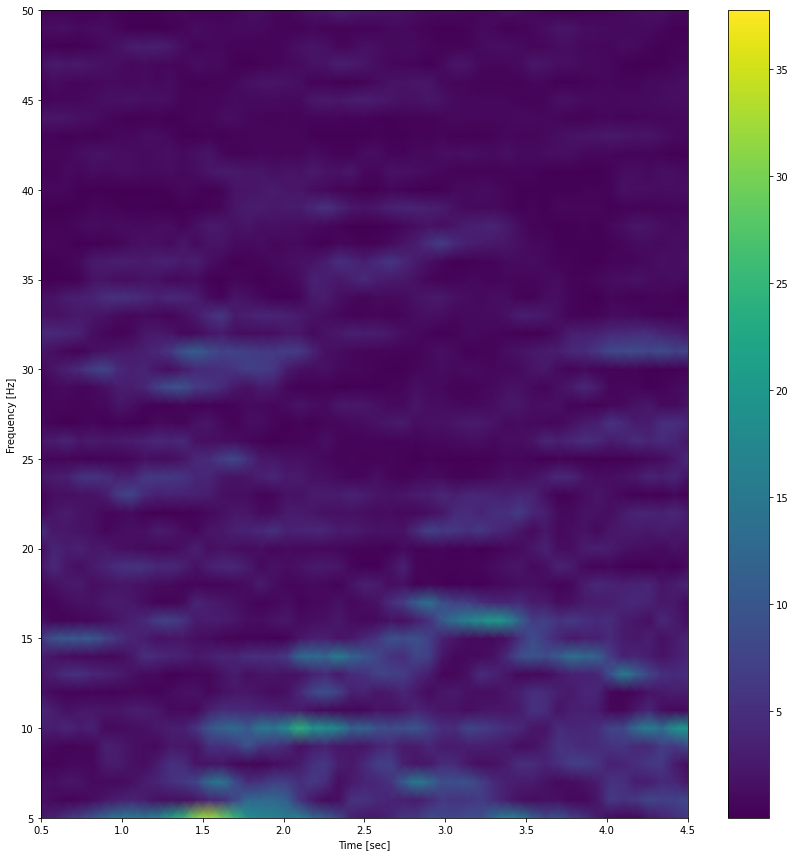

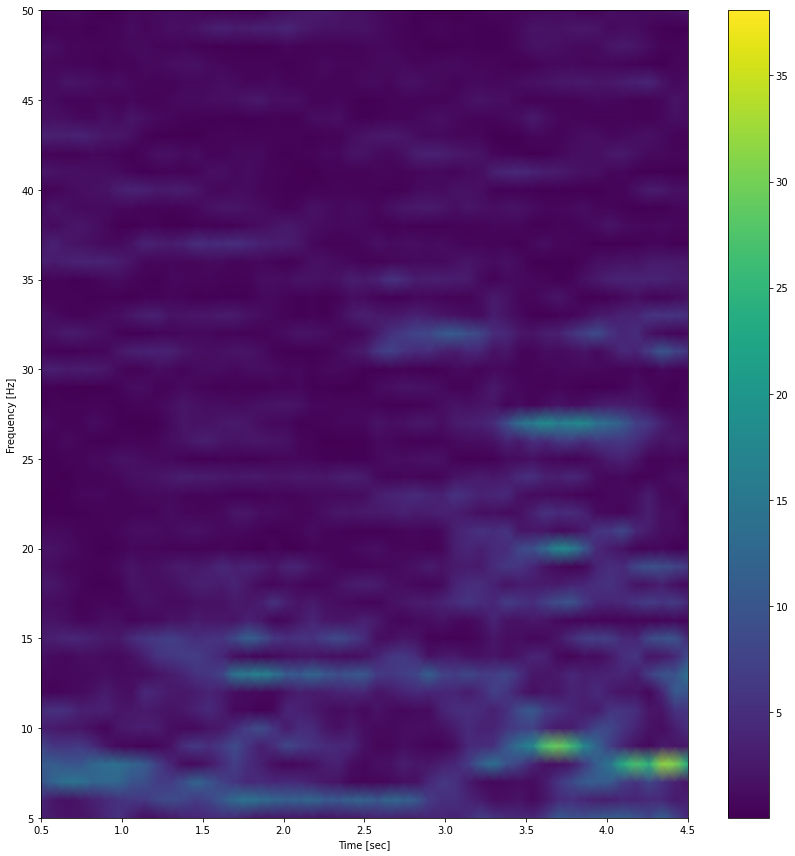

In [61]:
for z in range(len(f2_specs)):
    plot_spectrogram(f2_ts[z], f2_fs[z], f2_specs[z])